#Averaging Fourier coefficients

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.fftpack

Here, instead of just 1, we are generating a 100 Random Time Series They all have same Sine Wave Component (20Hz) with the magnitude of 1. Difference is that they all have random phase offsets(btw 0 & 1).

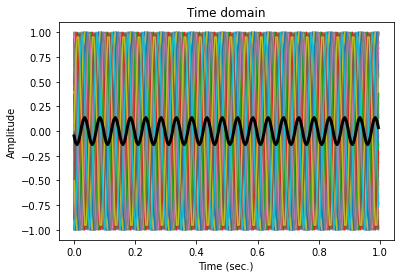

In [3]:
# simulation parameters
ntrials = 100
srate   = 200 # Hz
time    = np.arange(0,1,1/srate)
pnts    = len(time)


# create dataset
data = np.zeros((ntrials,pnts))
for triali in range(0,ntrials):
    data[triali,:] = np.sin(2*np.pi*20*time + 2*np.pi*np.random.rand())

# plot the data
for i in range(0,ntrials):
    plt.plot(time,data[i,:])
plt.plot(time,np.mean(data,axis=0),'k',linewidth=3)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
# plt.xlim([0,.1])

plt.show()

The black line is the average. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


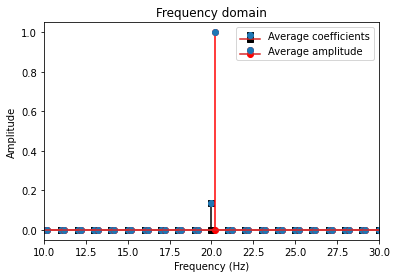

In [8]:
# get Fourier coefficients
dataX = scipy.fftpack.fft(data,axis=1) / pnts
hz = np.linspace(0,srate/2,int(np.floor(pnts/2))+1)

# averaging option 1: complex Fourier coefficients, then magnitude
ave1 = 2*np.abs( np.mean(dataX,axis=0) )

# averaging option 2: magnitude, then complex Fourier coefficients
ave2 = np.mean( 2*np.abs(dataX),axis=0 )

# plot both amplitude spectra
plt.stem(hz,ave1[0:len(hz)],'ks-',label='Average coefficients') 
plt.stem(hz+.2,ave2[0:len(hz)],'ro-',label='Average amplitude') 
#Shifted by 0.2 to be able to visualize properly. Else, they shall overlap.
plt.xlim([10,30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.legend()
plt.show()